# Dataset loading, cleanup, & exploration

In [1]:
%load_ext lab_black

In [2]:
from datetime import datetime
import pickle
import json


# Loading data
import pandas as pd

# High performance maths
import numpy as np

# Visualization
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [14]:
layout = dict(height=800)

In [4]:
raw_dataset = pd.read_csv("./data/dataset.csv")
print(raw_dataset.columns)
raw_dataset.index = pd.to_datetime(raw_dataset.Time)

raw_dataset

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.



Index(['Unnamed: 0', 'Time', 'Std LS axis 0', 'Std LS axis 1', 'Std LS axis 2',
       'LS axis 0', 'LS axis 1', 'LS axis 2', 'Nominal axis 0',
       'Nominal axis 1', 'Nominal axis 2', 'Sequence_number', 'Direction',
       '57-5a-4c-02-32-14', '57-5a-4c-02-5b-65', '57-5a-4c-02-5b-a1',
       '57-5a-4c-02-89-9d', '57-5a-4c-02-8a-28', '57-5a-4c-02-8a-5f',
       '57-5a-4c-02-8a-9d', '57-5a-4c-02-8a-d8', '57-5a-4c-02-8c-1d',
       '57-5a-4c-02-8c-9a', '57-5a-4c-02-92-d2', '57-5a-4c-02-9a-51',
       '57-5a-4c-12-b5-52', '57-5a-4c-1d-35-e2', '57-5a-4c-81-75-d7',
       '57-5a-4c-81-75-e3', '57-5a-4c-81-93-96', '57-5a-4c-81-93-9a',
       '57-5a-4c-81-93-9d', '57-5a-4c-81-93-a8', '57-5a-4c-81-93-aa',
       '57-5a-4c-a2-e8-ef', '57-5a-4c-d2-14-16', '57-5a-4c-d2-a4-92',
       '57-5a-4c-d2-a4-d8', '57-5a-4c-d8-c9-ce', '57-5a-4c-f3-79-d7',
       '57-5a-4c-f3-7a-0a', '57-5a-4c-f3-7a-21'],
      dtype='object')


Unnamed: 0  \
Time                                              
2021-03-03 12:19:06.272718848+00:00           0   
2021-03-03 12:19:30.424446208+00:00           1   
2021-03-03 12:20:01.619698944+00:00           2   
2021-03-03 12:20:26.003936+00:00              3   
2021-03-03 12:20:49.636113920+00:00           4   
...                                         ...   
2021-04-11 01:02:11.946624+00:00         395482   
2021-04-11 01:02:18.141364224+00:00      395483   
2021-04-11 01:02:24.335405056+00:00      395484   
2021-04-11 01:02:56.314465024+00:00      395485   
2021-04-11 01:03:19.918927872+00:00      395486   

                                                               Time  \
Time                                                                  
2021-03-03 12:19:06.272718848+00:00  2021-03-03T12:19:06.272718848Z   
2021-03-03 12:19:30.424446208+00:00  2021-03-03T12:19:30.424446208Z   
2021-03-03 12:20:01.619698944+00:00  2021-03-03T12:20:01.619698944Z   
2021-03-03 12:20:26.003936+00:00        2021-03-03T12:20:26.003936Z   
2021-03-03 12:20:49.636113920+00:00   2021-03-03T12:20:49.63611392Z   
...                                                             ...   
2021-04-11 01:02:11.946624+00:00        2021-04-11T01:02:11.946624Z   
2021-04-11 01:02:18.141364224+00:00  2021-04-11T01:02:18.141364224Z   
2021-04-11 01:02:24.335405056+00:00  2021-04-11T01:02:24.335405056Z   
2021-04-11 01:02:56.314465024+00:00  2021-04-11T01:02:56.314465024Z   
2021-04-11 01:03:19.918927872+00:00  2021-04-11T01:03:19.918927872Z   

                                     Std LS axis 0  Std LS axis 1  \
Time                                                                
2021-03-03 12:19:06.272718848+00:00       0.000003   2.163615e-06   
2021-03-03 12:19:30.424446208+00:00       0.000009   3.067815e-06   
2021-03-03 12:20:01.619698944+00:00       0.000001   4.340306e-06   
2021-03-03 12:20:26.003936+00:00          0.000013   1.100537e-05   
2021-03-03 12:20:49.636113920+00:00       0.000003   1.272756e-06   
...                                            ...            ...   
2021-04-11 01:02:11.946624+00:00          0.000002   5.339532e-06   
2021-04-11 01:02:18.141364224+00:00       0.000002   6.150597e-06   
2021-04-11 01:02:24.335405056+00:00       0.000007   7.184989e-06   
2021-04-11 01:02:56.314465024+00:00       0.000003   9.043419e-06   
2021-04-11 01:03:19.918927872+00:00       0.000002   5.657342e-07   

                                     Std LS axis 2  LS axis 0  LS axis 1  \
Time                                                                       
2021-03-03 12:19:06.272718848+00:00       0.000002   0.000035   0.000061   
2021-03-03 12:19:30.424446208+00:00       0.000006  -0.999767   0.000133   
2021-03-03 12:20:01.619698944+00:00       0.000003   0.000102  -1.000099   
2021-03-03 12:20:26.003936+00:00          0.000005  -0.000066   0.000049   
2021-03-03 12:20:49.636113920+00:00       0.000001  -0.499701   0.000080   
...                                            ...        ...        ...   
2021-04-11 01:02:11.946624+00:00          0.000003  -0.799693  -0.800101   
2021-04-11 01:02:18.141364224+00:00       0.000003  -0.899685  -0.900114   
2021-04-11 01:02:24.335405056+00:00       0.000005  -0.999719  -1.000105   
2021-04-11 01:02:56.314465024+00:00       0.000004  -0.000090   0.000002   
2021-04-11 01:03:19.918927872+00:00       0.000001  -0.999841   0.000037   

                                     LS axis 2  Nominal axis 0  \
Time                                                             
2021-03-03 12:19:06.272718848+00:00  -0.000026             0.0   
2021-03-03 12:19:30.424446208+00:00  -0.000051            -1.0   
2021-03-03 12:20:01.619698944+00:00  -0.000032             0.0   
2021-03-03 12:20:26.003936+00:00     -0.400075             0.0   
2021-03-03 12:20:49.636113920+00:00  -0.000127            -0.5   
...                                        ...             ...   
2021-04-11 01:02:11.946624+00:00  

In [7]:
type(raw_dataset["LS axis 0"])

pandas.core.series.Series

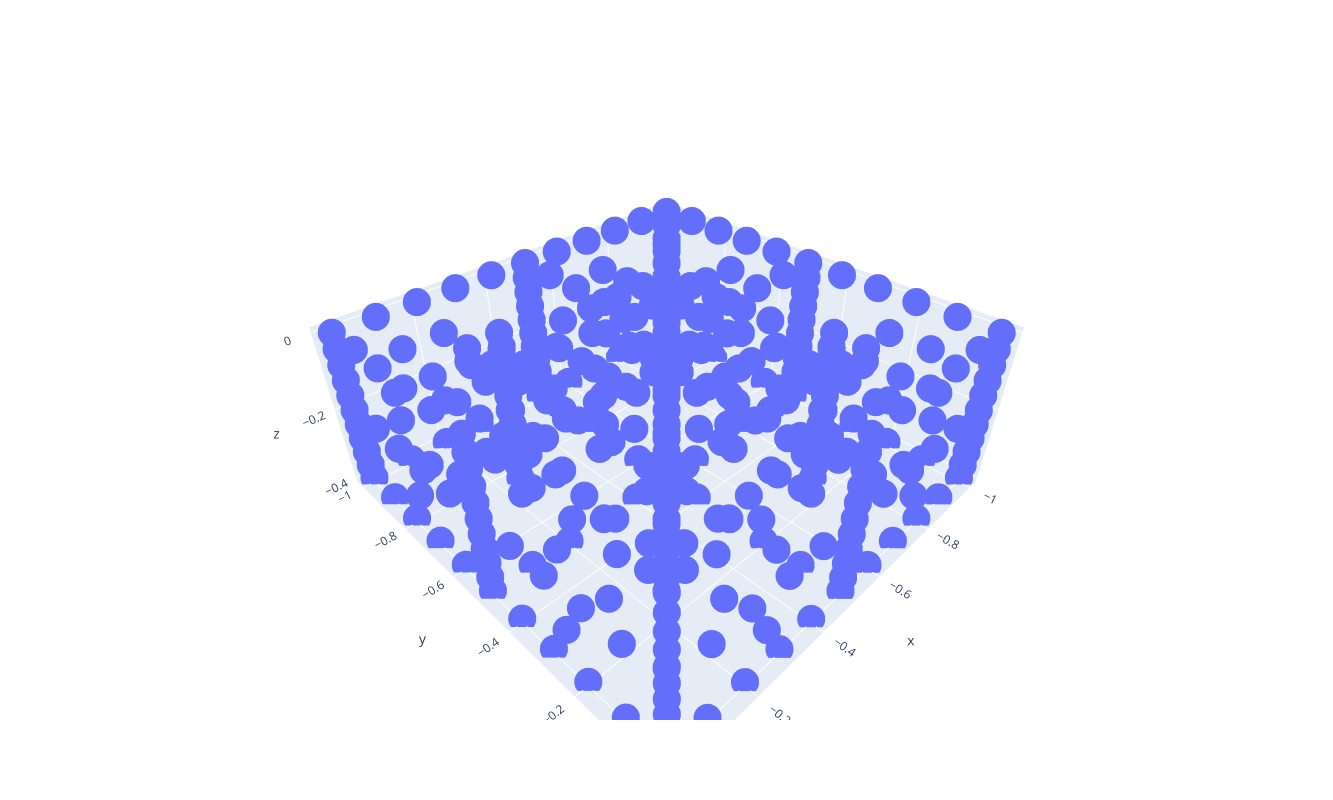

In [16]:
data_reduction_factor = 100

data = [
    go.Scatter3d(
        x=raw_dataset["LS axis 0"][::data_reduction_factor],
        y=raw_dataset["LS axis 1"][::data_reduction_factor],
        z=raw_dataset["LS axis 2"][::data_reduction_factor],
        #         marker={
        #             "color": clean_dataset["Lichtbogenart_categories"],
        #             "size": 2,
        #         },
        mode="markers",
    )
]
fig = {
    "data": data,
    "layout": layout,
}
iplot(fig, filename="3d-data")

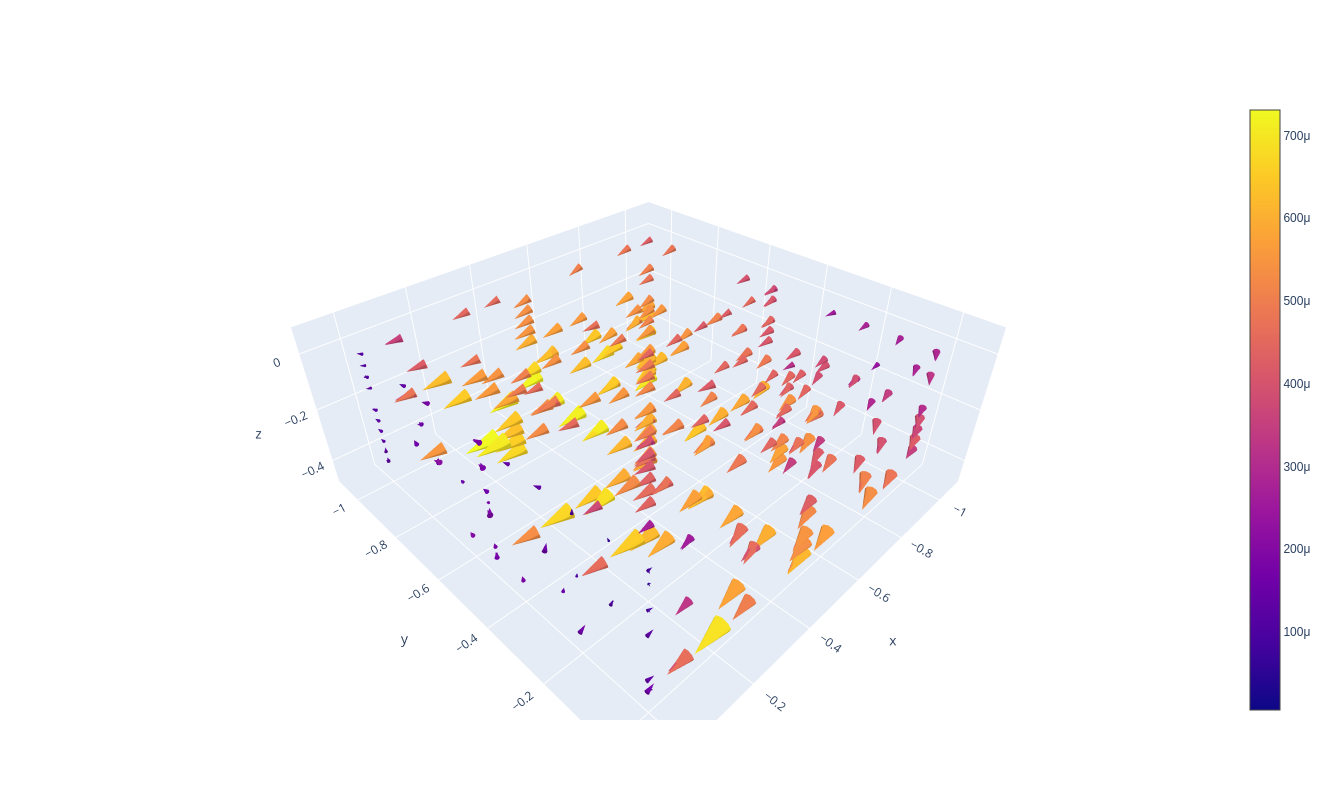

In [18]:
data_reduction_factor = 1000

data = [
    go.Cone(
        x=raw_dataset["LS axis 0"][::data_reduction_factor],
        y=raw_dataset["LS axis 1"][::data_reduction_factor],
        z=raw_dataset["LS axis 2"][::data_reduction_factor],
        #         marker={
        #             "color": clean_dataset["Lichtbogenart_categories"],
        #             "size": 2,
        #         },
        u=raw_dataset["LS axis 0"][::data_reduction_factor]
        - raw_dataset["Nominal axis 0"][::data_reduction_factor],
        v=raw_dataset["LS axis 1"][::data_reduction_factor]
        - raw_dataset["Nominal axis 1"][::data_reduction_factor],
        w=raw_dataset["LS axis 2"][::data_reduction_factor]
        - raw_dataset["Nominal axis 2"][::data_reduction_factor],
    )
]
fig = {
    "data": data,
    "layout": layout,
}
iplot(fig, filename="3d-data")